#Importing main libs and set options

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

#Functions to prepare data

In [9]:
def toFixed(numObj):
    return int(str(numObj).split(".")[0])

def normalize(data, start=4184, end=4635):
    data = data.sort_values(by=['depth'])
    data['depth'] = data['depth'].apply(toFixed)
    col = [i for i in range(start, end + 1)]
    new = []
    name = data.columns[1]
    for c in col:
        new.append([c, np.median(data.loc[data['depth'] == c][name])])
    data = pd.DataFrame(new, columns=['depth', name]).interpolate(method='nearest')
    if str(data[name][len(data) - 1]) == 'nan':
        data[name][len(data) - 1] = float(data[name][len(data) - 2])
    return data

def normalize_two(data, start, end):
    data = data.sort_values(by=['depth'])
    data['depth'] = data['depth'].apply(toFixed)
    col = [i for i in range(start, end + 1)]
    new = []
    name = data.columns[1]
    for c in col:
        new.append([c, np.median(data.loc[data['depth'] == c][name])])
    data = pd.DataFrame(new, columns=['depth', name])
    return data

def normalize_join(first, second, start=4184, end=4635):
    new = []
    name = first.columns[1]
    some = normalize_two(first, start, end).drop('depth', axis=1).values
    some2 = normalize_two(second, start, end).drop('depth', axis=1).values
    for so, so2 in zip(some, some2):
        so = so[0]
        so2 = so2[0]
        if (str(so) == "nan"):
            new.append([start, so2])
        elif (str(so) != "nan" and str(so2) == "nan"):
            new.append([start, so])
        elif (str(so) != "nand([start, so])n" and str(so2) != "nan"):
            new.append([start, so2])
        start += 1
    new = pd.DataFrame(new, columns=['depth', name])
    new = new.interpolate(method="nearest")
    if str(new[name][len(new) - 1]) == 'nan':
        new[name][len(new) - 1] = float(new[name][len(new) - 2])
    return new

#Well 6201 11-1

##Чтение и нормализация данных

In [10]:
BD_095_195 = pd.read_csv("../WELL_X/BD_X _0.95-1.95_.csv", sep=",", names=['depth', 'bd'], header=None)
BD_195_295 = pd.read_csv("../WELL_X/BD_X _1.95-2.95_.csv", sep=",", names=['depth', 'bd'], header=None)
DR6406 = normalize(pd.read_csv("../WELL_X/DR_X.csv", sep=",", names=['depth', 'dr'], header=None))
GMR0_150 = pd.read_csv("../WELL_X/GM_X _0-150_.csv", sep=",", names=['depth', 'gmr'], header=None)
GMR150_300 = pd.read_csv("../WELL_X/GM_X _150-300_(1).csv", sep=",", names=['depth', 'gmr'], header=None)
MR = normalize(pd.read_csv("../WELL_X/MR_X.csv", sep=",", names=['depth', 'mr'], header=None))
NP = normalize(pd.read_csv("../WELL_X/NP_X _0.45_-0.15__.csv", sep=",", names=['depth', 'np'], header=None))
SR = normalize(pd.read_csv("../WELL_X/SR_X.csv", sep=",",  names=['depth', 'sr'], header=None))
sonic = normalize(pd.read_csv("../WELL_X/Sonic_X.csv", sep=",",  names=['depth', 'sonic'], header=None))
GMR = normalize_join(GMR0_150, GMR150_300)
BD = normalize_join(BD_095_195, BD_195_295)

from sklearn import preprocessing
MR.fillna(101, inplace=True)


/home/core/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/core/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/core/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/core/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/core/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/core/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/core/anaconda3/lib/python3.7/site-packages/numpy/core/from

In [11]:
normalized_BD = pd.DataFrame(preprocessing.normalize(BD.drop("depth", axis=1)))
normalized_GMR = pd.DataFrame(preprocessing.normalize(GMR.drop("depth", axis=1)))
normalized_sonic = pd.DataFrame(preprocessing.normalize(sonic.drop("depth", axis=1)))
normalized_SR = pd.DataFrame(preprocessing.normalize(SR.drop("depth", axis=1)))
normalized_NP = pd.DataFrame(preprocessing.normalize(NP.drop("depth", axis=1)))
normalized_MR = pd.DataFrame(preprocessing.normalize(MR.drop("depth", axis=1)))
normalized_DR6406 = pd.DataFrame(preprocessing.normalize(DR6406.drop("depth", axis=1)))
depth = pd.DataFrame(sonic.depth)

##Объединение всех параметров в один датафрейм

In [12]:
data = pd.concat([SR.drop("depth", axis=1), MR.drop("depth", axis=1), NP.drop("depth", axis=1), sonic.drop("depth", axis=1), BD.drop("depth", axis=1), DR6406.drop("depth", axis=1), GMR.drop("depth", axis=1)], axis=1)
#data['np'] = data['np'].fillna(0)
#data['sr'] = data['sr'].fillna(data.sr.max())

In [13]:
data = pd.DataFrame(preprocessing.normalize(data))
#data = pd.concat([depth, data], axis=1)

In [14]:
data

,0,1,2,3,4,5,6
0,0.487244,0.452338,0.001339,0.368817,0.011559,0.423276,0.492605
1,0.479356,0.461049,0.001440,0.365047,0.011879,0.428658,0.490409
2,0.368575,0.459842,0.001574,0.396309,0.012089,0.436289,0.552395
3,0.271398,0.468350,0.001645,0.426570,0.012632,0.437576,0.577403
4,0.257690,0.492832,0.001600,0.434591,0.012877,0.408181,0.578847
5,0.290368,0.425585,0.001625,0.449490,0.012867,0.386951,0.618566
6,0.274739,0.492807,0.001778,0.438059,0.011984,0.418041,0.561124
7,0.265981,0.460620,0.001648,0.410265,0.011849,0.425231,0.606466
8,0.320002,0.476004,0.001517,0.394047,0.011967,0.422518,0.580585
9,0.261629,0.484450,0.001612,0.447611,0.012661,0.440947,0.549459


##Кластеризация

Попробуем кластеризировать данные

###Иерархическая кластеризация

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram

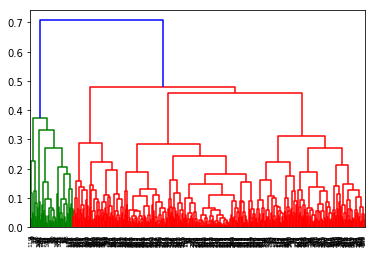

In [16]:
samples = data.values
mergings = linkage(samples, method='complete')

dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

###K-mean

In [17]:
from sklearn import datasets
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(data.values)

all_predictions = model.predict(data.values)

In [18]:
data_cluster = pd.DataFrame(np.c_[data.values, all_predictions])
data_cluster.columns = list(data.columns) + ["class"]
data_cluster

,0,1,2,3,4,5,6,class
0,0.487244,0.452338,0.001339,0.368817,0.011559,0.423276,0.492605,0.0
1,0.479356,0.461049,0.001440,0.365047,0.011879,0.428658,0.490409,0.0
2,0.368575,0.459842,0.001574,0.396309,0.012089,0.436289,0.552395,0.0
3,0.271398,0.468350,0.001645,0.426570,0.012632,0.437576,0.577403,0.0
4,0.257690,0.492832,0.001600,0.434591,0.012877,0.408181,0.578847,0.0
5,0.290368,0.425585,0.001625,0.449490,0.012867,0.386951,0.618566,0.0
6,0.274739,0.492807,0.001778,0.438059,0.011984,0.418041,0.561124,0.0
7,0.265981,0.460620,0.001648,0.410265,0.011849,0.425231,0.606466,0.0
8,0.320002,0.476004,0.001517,0.394047,0.011967,0.422518,0.580585,0.0
9,0.261629,0.484450,0.001612,0.447611,0.012661,0.440947,0.549459,0.0


In [27]:
data_cluster = pd.concat([data_cluster['class'], depth], axis=1)

In [28]:
data_cluster

,class,depth
0,0.0,4184
1,0.0,4185
2,0.0,4186
3,0.0,4187
4,0.0,4188
5,0.0,4189
6,0.0,4190
7,0.0,4191
8,0.0,4192
9,0.0,4193


In [29]:
data_cluster.to_csv("data_cluster.csv")

###TSNE

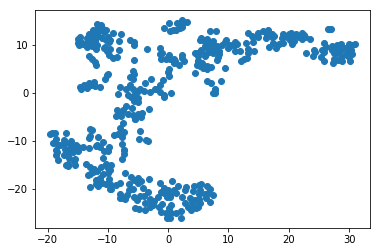

In [21]:
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model = TSNE(learning_rate=100)

transformed = model.fit_transform(data)

x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

#Logistic regression

Попробуем создать модель для классификации для других скважин. Позже попробуем протестировать ее на других скажинах

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

Получим целевые переменные:

In [23]:
rocks = pd.read_csv("Rocks 6406_3-4 - Sheet2.csv", sep=',')
rocks

,"Depth, m",Name,Description,2nd minerals
0,3931,Sandstones\n,medium and coarse-grained,mica
1,4020,Claystones,NaN,Pyrite
2,4027,Sandstones\n,medium and coarse-grained,"silstones, mica"
3,4050,intervals fo sandstone and coal,NaN,NaN
4,4060,coal,NaN,NaN
5,4067,Sandstones,NaN,NaN
6,4140,"intervals fo sandstone, claystone, shale",sandstone dominates,"Mica, siderit"
7,4300,poorly sorted Sandstones,Quartz >90%,Bioturbation
8,4375,coarse-grained sandstones,"Shale clasts, coaly plant remains are common",Bioturbation


In [24]:
classes = []
for i in range(3931, 4021):
    classes.append([i, 0])
for i in range(4020, 4028):
    classes.append([i, 1])
for i in range(4027, 4051):
    classes.append([i, 2])
for i in range(4050, 4061):
    classes.append([i, 3])
for i in range(4060, 4068):
    classes.append([i, 4])
for i in range(4067, 4141):
    classes.append([i, 5])
for i in range(4140, 4301):
    classes.append([i, 6])
for i in range(4300, 4376):
    classes.append([i, 7])

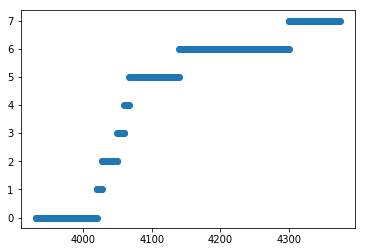

In [25]:
classes = pd.DataFrame(classes, columns=['depth', 'class'])
fig = plt.Figure()
plt.scatter(classes['depth'].values, classes['class'].values)
plt.show()

In [26]:
data_set = classes.merge(data, on='depth')

KeyError: 'depth'

In [ ]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    data_set.drop('class',axis=1), data_set['class'], test_size=0.15, random_state=42)

In [ ]:
clf = LogisticRegression(C=1)
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)
accuracy_score(test_labels, y_pred)

In [ ]:
clf = LogisticRegression(solver='saga')


param_grid = {
    'C': np.arange(1, 5),
    'penalty': ['l1', 'l2'],
}

search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

search.fit(data_set.drop('class',axis=1), data_set['class'])

print(search.best_params_)

In [365]:
clf = LogisticRegression(C=3, penalty='l1')
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)
accuracy_score(test_labels, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7941176470588235

##Cохранение модели

In [0]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))